In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('titanic.csv')
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [8]:
df.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'survived'],
      dtype='object')

# Data cleaning:



In [9]:
df.duplicated().any()

np.False_

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [11]:
df.isnull().sum()

pclass         0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
survived       0
dtype: int64

In [12]:
emb_md=df['embarked'].mode()[0]
age_med=df['age'].median()
fare_med=df['fare'].median()

for col,val in zip(['embarked','age','fare'],[emb_md,age_med,fare_med]):
    df[col]=df[col].fillna(val)

In [13]:
df=df.dropna(axis=1)

# FEATURE ENGINEERING

In [14]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0


In [15]:
df['sibsp']+df['parch']
df['family_cnt']=df['sibsp']+df['parch']

In [16]:
df=df.drop(columns=['sibsp','parch'])

In [17]:
df=df.sort_values(by='ticket').reset_index(drop=True)

In [18]:
x=df['ticket'].value_counts()
x[x==1].index
solo=x[x==1].index


In [19]:
def comp_type(row):    
    if row['ticket'] in (solo):
        return 'solo'
    else:
        if row['family_cnt']==0:
            return 'friends'
        else:
            return 'family'
        
df['companion_type']=df.apply(comp_type,axis=1)


In [20]:
df.head()

,pclass,name,sex,age,ticket,fare,embarked,survived,family_cnt,companion_type
0,1,"Cherry, Miss. Gladys",female,30.0,110152,86.50,S,1,0,friends
1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,110152,86.50,S,1,0,friends
2,1,"Maioni, Miss. Roberta",female,16.0,110152,86.50,S,1,0,friends
3,1,"Taussig, Miss. Ruth",female,18.0,110413,79.65,S,1,2,family
4,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,110413,79.65,S,1,2,family


In [21]:
df[['lname','tit_fname']]=df['name'].str.split(',',expand=True)
df[['courtesy_title','fname']]=df['tit_fname'].str.split('.',n=1,expand=True)

for col in ['courtesy_title','fname','lname']:
    df[col]=df[col].str.strip()


df=df.drop(columns=['name','tit_fname'])


In [22]:
df.head()

,pclass,sex,age,ticket,fare,embarked,survived,family_cnt,companion_type,lname,courtesy_title,fname
0,1,female,30.0,110152,86.50,S,1,0,friends,Cherry,Miss,Gladys
1,1,female,33.0,110152,86.50,S,1,0,friends,Rothes,the Countess,of (Lucy Noel Martha Dyer-Edwards)
2,1,female,16.0,110152,86.50,S,1,0,friends,Maioni,Miss,Roberta
3,1,female,18.0,110413,79.65,S,1,2,family,Taussig,Miss,Ruth
4,1,female,39.0,110413,79.65,S,1,2,family,Taussig,Mrs,Emil (Tillie Mandelbaum)


In [23]:
df['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [24]:

df['embarked']=df['embarked'].replace({'S':'Southampton','C':'Cherbourg','Q':'Queenstown'})

In [25]:
df.head()

,pclass,sex,age,ticket,fare,embarked,survived,family_cnt,companion_type,lname,courtesy_title,fname
0,1,female,30.0,110152,86.50,Southampton,1,0,friends,Cherry,Miss,Gladys
1,1,female,33.0,110152,86.50,Southampton,1,0,friends,Rothes,the Countess,of (Lucy Noel Martha Dyer-Edwards)
2,1,female,16.0,110152,86.50,Southampton,1,0,friends,Maioni,Miss,Roberta
3,1,female,18.0,110413,79.65,Southampton,1,2,family,Taussig,Miss,Ruth
4,1,female,39.0,110413,79.65,Southampton,1,2,family,Taussig,Mrs,Emil (Tillie Mandelbaum)


In [26]:
df=df.rename(columns={'sex':'Gender'})

In [27]:
df.columns

Index(['pclass', 'Gender', 'age', 'ticket', 'fare', 'embarked', 'survived',
       'family_cnt', 'companion_type', 'lname', 'courtesy_title', 'fname'],
      dtype='object')

In [28]:
df['age_category']=pd.cut(df['age'],bins=[0,3,17,31,60,100],labels=['baby','child','teen','adult','senior'])
df['age_category']

0         teen
1        adult
2        child
3         teen
4        adult
         ...  
1304     adult
1305     adult
1306      teen
1307    senior
1308     adult
Name: age_category, Length: 1309, dtype: category
Categories (5, object): ['baby' < 'child' < 'teen' < 'adult' < 'senior']

In [29]:
lst=['ticket','courtesy_title','fname','lname','age','age_category','Gender','pclass','family_cnt','companion_type','embarked','fare','survived']
df=df[lst]
df

,ticket,courtesy_title,fname,lname,age,age_category,Gender,pclass,family_cnt,companion_type,embarked,fare,survived
0,110152,Miss,Gladys,Cherry,30.0,teen,female,1,0,friends,Southampton,86.500,1
1,110152,the Countess,of (Lucy Noel Martha Dyer-Edwards),Rothes,33.0,adult,female,1,0,friends,Southampton,86.500,1
2,110152,Miss,Roberta,Maioni,16.0,child,female,1,0,friends,Southampton,86.500,1
3,110413,Miss,Ruth,Taussig,18.0,teen,female,1,2,family,Southampton,79.650,1
4,110413,Mrs,Emil (Tillie Mandelbaum),Taussig,39.0,adult,female,1,2,family,Southampton,79.650,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,W.E.P. 5734,Mrs,Herbert Fuller (Carrie Constance Toogood),Chaffee,47.0,adult,female,1,1,family,Southampton,61.175,1
1305,W.E.P. 5734,Mr,Herbert Fuller,Chaffee,46.0,adult,male,1,1,family,Southampton,61.175,0
1306,W/C 14208,Mr,Walter,Harris,30.0,teen,male,2,0,solo,Southampton,10.500,0
1307,WE/P 5735,Capt,Edward Gifford,Crosby,70.0,senior,male,1,2,family,Southampton,71.000,0


In [30]:
tit_cnt=dict((df['ticket'].value_counts()))

df['no_of_psg']=df['ticket'].map(tit_cnt)

df['fare']=df['fare']/df['no_of_psg']

df=df.drop(columns='no_of_psg')
df

,ticket,courtesy_title,fname,lname,age,age_category,Gender,pclass,family_cnt,companion_type,embarked,fare,survived
0,110152,Miss,Gladys,Cherry,30.0,teen,female,1,0,friends,Southampton,28.833333,1
1,110152,the Countess,of (Lucy Noel Martha Dyer-Edwards),Rothes,33.0,adult,female,1,0,friends,Southampton,28.833333,1
2,110152,Miss,Roberta,Maioni,16.0,child,female,1,0,friends,Southampton,28.833333,1
3,110413,Miss,Ruth,Taussig,18.0,teen,female,1,2,family,Southampton,26.550000,1
4,110413,Mrs,Emil (Tillie Mandelbaum),Taussig,39.0,adult,female,1,2,family,Southampton,26.550000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,W.E.P. 5734,Mrs,Herbert Fuller (Carrie Constance Toogood),Chaffee,47.0,adult,female,1,1,family,Southampton,30.587500,1
1305,W.E.P. 5734,Mr,Herbert Fuller,Chaffee,46.0,adult,male,1,1,family,Southampton,30.587500,0
1306,W/C 14208,Mr,Walter,Harris,30.0,teen,male,2,0,solo,Southampton,10.500000,0
1307,WE/P 5735,Capt,Edward Gifford,Crosby,70.0,senior,male,1,2,family,Southampton,35.500000,0


In [31]:
def courtesy_title(row):
    if row['courtesy_title'] in ["Mr", "Mrs", "Mme", "Miss", "Ms", "Mlle", "Master"]:
        return "Common"
    elif row['courtesy_title'] in ["the Countess", "Lady", "Sir", "Don", "Dona"]:
        return "Royal"
    elif row['courtesy_title'] in ["Dr", "Major", "Col", "Capt"]:
        return "Professional"
    elif row['courtesy_title'] == "Rev":
        return "Church leader"
    else:
        return "Other"

df['courtesy_title']=df.apply(courtesy_title,axis=1)


In [32]:
crew_members=df.loc[df['fare']==0]

In [33]:
idx=df.loc[df['fare']==0].index

df=df.drop(index=idx)

In [34]:
df=df.reset_index(drop=True)
crew_members=crew_members.reset_index(drop=True)

# Data Analysis
---------------------------------

# Analysis is to find which factors  are affecting the survival rate


1.How many passengers(including crew members) are present in this dataset

In [35]:
crew_members.shape[0]+df.shape[0]

1309

2.How many crew members are present 

In [36]:
crew_members.shape[0]

17

3.Find the no. of passenger

In [37]:
df.shape[0]

1292

4.Get the statistical description of all the numerical columns

In [38]:
df.describe()

,age,pclass,family_cnt,fare,survived
count,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000
mean,29.468008,2.301084,0.895511,14.951572,0.385449
std,12.953286,0.836743,1.590759,13.532453,0.486890
min,0.166700,1.000000,0.000000,3.170800,0.000000
25%,22.000000,2.000000,0.000000,7.666667,0.000000
50%,28.000000,3.000000,0.000000,8.081250,0.000000
75%,35.000000,3.000000,1.000000,15.045800,1.000000
max,80.000000,3.000000,10.000000,128.082300,1.000000


observation:

Age:          Average 29.46 years, About ~68% of age fall between 16.5–42.4, ranging from 0.17 to 80.

Family Count: Majority traveled alone (median = 0), with some families as large as 10.

Fare:         Average 14.95, About ~68% of fares fall between 1.42 and 28.48.(low fares), 
              but some very high up to 128 (right-skewed).

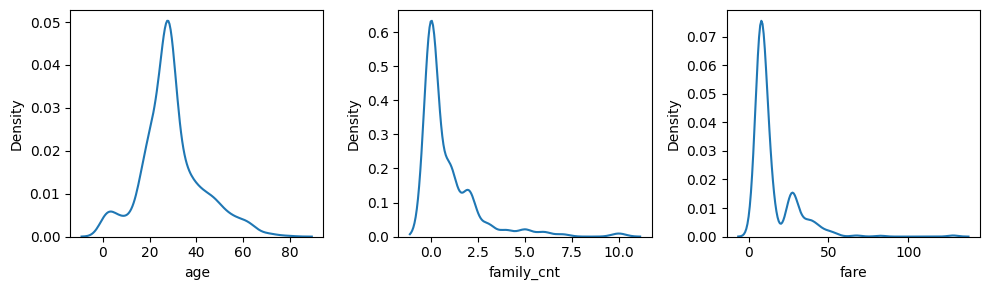

In [39]:
f,axes=plt.subplots(1,3,figsize=(10,3))

sns.kdeplot(df,x='age',ax=axes[0])
sns.kdeplot(df,x='family_cnt',ax=axes[1])
sns.kdeplot(df,x='fare',ax=axes[2])

plt.tight_layout()
plt.show()

skewness:

age is slightly right skewed

family_cnt and fare are right-skewed

6.Find the no. passenger in each gender

In [40]:
g=df.groupby(by='Gender')
g.agg({'Gender':'count'})

,Gender
Gender,
female,466
male,826


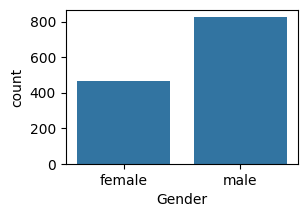

In [41]:
plt.figure(figsize=(3,2))
sns.countplot(df,x='Gender')
plt.show()

observation:

1. male passengers are more compared to female passengers

7.Find gender wise total fare


In [42]:
df.groupby(by='Gender').agg({'fare':'sum'}).round(2)

,fare
Gender,
female,7911.28
male,11406.15


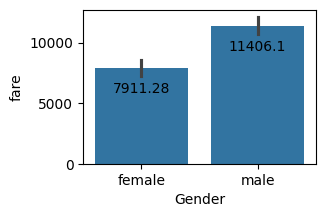

In [63]:
plt.figure(figsize=(3,2))
c=sns.barplot(df,x='Gender',y='fare',estimator='sum')
c.bar_label(c.containers[0],padding=-20)
plt.show()

observation: Male passengers paid more compared to Female passengers

8.Find the no. of psgs in each pclass (represent in percentage)

(proportion of psgs in each pclass)

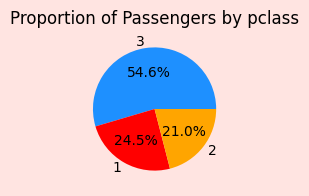

In [44]:
p=df['pclass'].value_counts()

plt.figure(figsize=(3,2),facecolor='mistyrose')
plt.pie(x=p.values,labels=p.index,autopct='%.1f%%',colors=['dodgerblue', 'red', 'orange'])
plt.title('Proportion of Passengers by pclass')

plt.show()

observation: ~50% of passengers are in pclass 3

9.Find the pclass and gender wise count and total fare

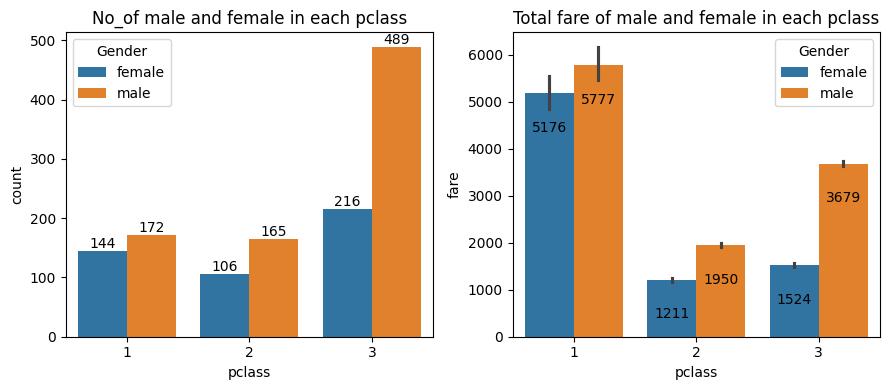

In [45]:
fig,axes=plt.subplots(1,2,figsize=(9,4))

c=sns.countplot(df,x='pclass',hue='Gender',ax=axes[0])
b=sns.barplot(df,x='pclass',hue='Gender',y='fare',estimator='sum',ax=axes[1])

axes[0].set_title('No_of male and female in each pclass')
axes[1].set_title('Total fare of male and female in each pclass')


for i in c.containers:
    c.bar_label(i)


for i in b.containers:
    b.bar_label(i,fmt='%.0f',padding=-30)

plt.tight_layout()


observation: Male passengers were the majority in each pclass, so their total fare is higher than female passengers

10.Find the age_category wise no_of_passenger and total_fare in each pclass

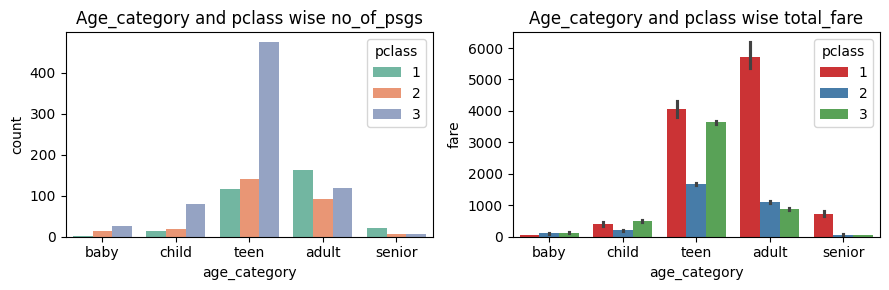

In [46]:
fig,axes=plt.subplots(1,2,figsize=(9,3))

sns.countplot(df,hue='pclass',x='age_category',ax=axes[0],palette='Set2')
sns.barplot(df,hue='pclass',x='age_category',y='fare',estimator='sum',ax=axes[1],palette='Set1')

axes[0].set_title('Age_category and pclass wise no_of_psgs')
axes[1].set_title('Age_category and pclass wise total_fare')

plt.tight_layout()


observation: 

1. Teenagers are higher in number overall, and most of them preferred 3rd class.

2. Most adult and senior passengers preferred 1st class.

3. Since 1st class fares are higher, even with fewer passengers it still contributed the highest total fare compared to other classes.

11. courtesy_title wise no_of_psg and max_amount

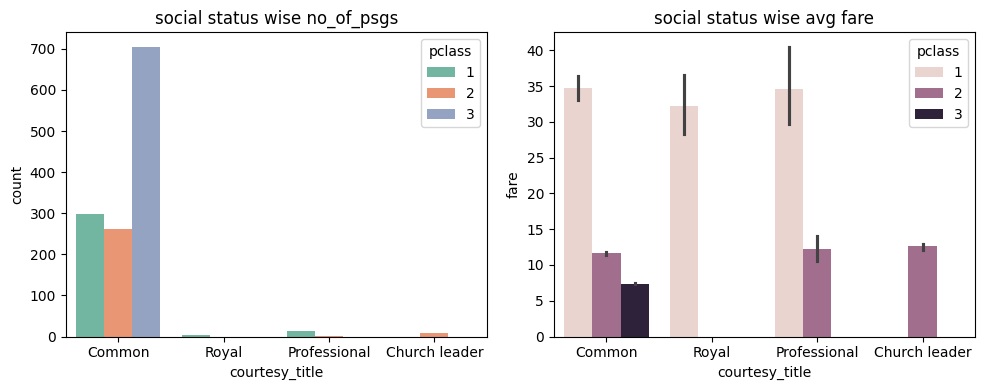

In [47]:
fig,axes=plt.subplots(1,2,figsize=(10,4))

sns.countplot(df,x='courtesy_title',hue='pclass',ax=axes[0],palette='Set2')
sns.barplot(df,x='courtesy_title',y='fare',estimator='mean',hue='pclass',ax=axes[1])

axes[0].set_title('social status wise no_of_psgs')
axes[1].set_title('social status wise avg fare')

plt.tight_layout()


Observations:

1. Most passengers were common people, and they mainly traveled in 3rd class, though some were also in 1st and 2nd class.

2. Royal, professional, and church leader passengers never chose 3rd class; they preferred 1st or 2nd class.

12. find the survival rate of male and female

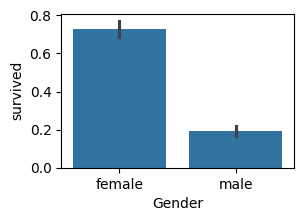

In [48]:
plt.figure(figsize=(3,2))
sns.barplot(df,x='Gender',y='survived')
plt.show()

observation: Female passengers had higher chances of survival compared to male passengers.

13. find the pclass wise survival rate of male and female

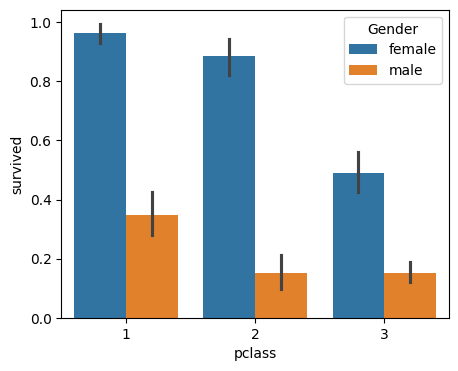

In [49]:
plt.figure(figsize=(5,4))
sns.barplot(df,x='pclass',hue='Gender',y='survived')
plt.show()

observation: Female passengers had higher chances of survival compared to male passengers across all pclass

14. find the social status wise survival rate

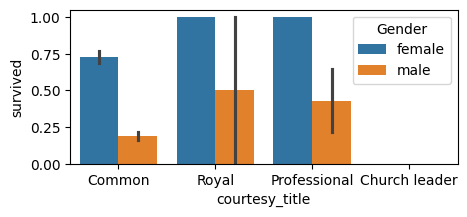

In [50]:
plt.figure(figsize=(5,2))
sns.barplot(df,x='courtesy_title',hue='Gender',y='survived')
plt.show()

In [51]:
df.loc[  (df['courtesy_title']=='Church leader') & df['Gender']=='female'].shape[0]

0

Observations:

1. Females of Royal and Professional status have 100% survival rate.

2. No females are in the Church leader category, and all male passengers in this category did not survive.

3. Among common people, females have higher chances of survival than males.

4. Male passengers of Royal status show very high variability in survival (hard to predict), while Professional males have moderate variability.

15. No_of male and female in each  age_category and pclass

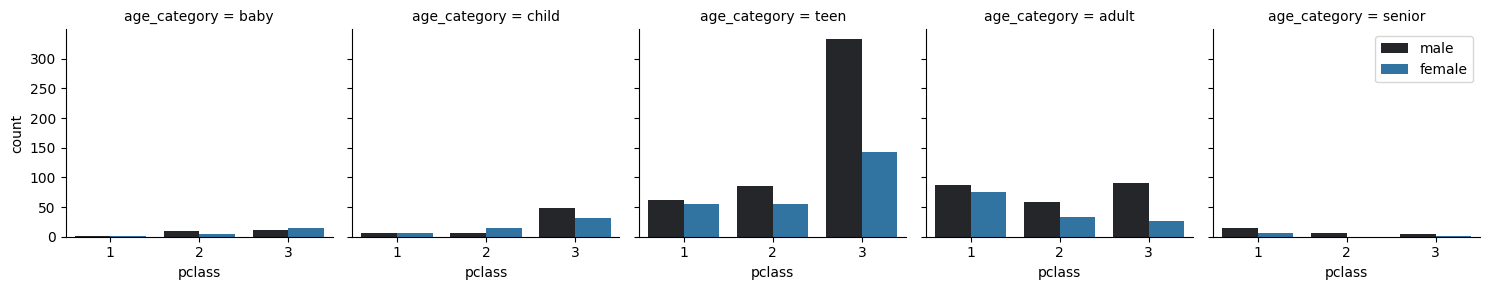

In [52]:
fg=sns.FacetGrid(df,col='age_category')
fg.map_dataframe(sns.countplot,x='pclass',hue='Gender',hue_order=['male','female'])
plt.legend()
plt.show()

16. find the age_category  wise  male and female count

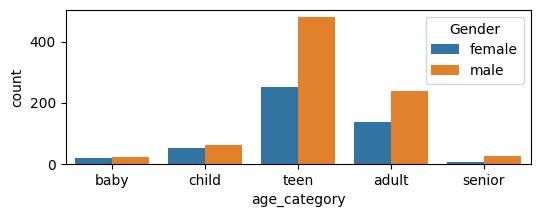

In [53]:
plt.figure(figsize=(6,2))
sns.countplot(df,x='age_category',hue='Gender')
plt.show()

observation : Males are the majority in all age groups.

17. find the age_category  wise survival rate of male and female

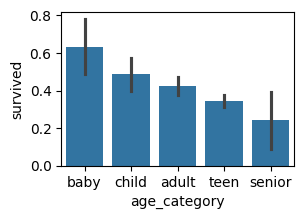

In [54]:
idx=df.groupby('age_category').agg({'survived':'mean'}).sort_values(by='survived',ascending=False).index

plt.figure(figsize=(3,2))
sns.barplot(df,x='age_category',y='survived',order=idx)
plt.show()

18. find the age_category and pclass wise survival rate of male and female

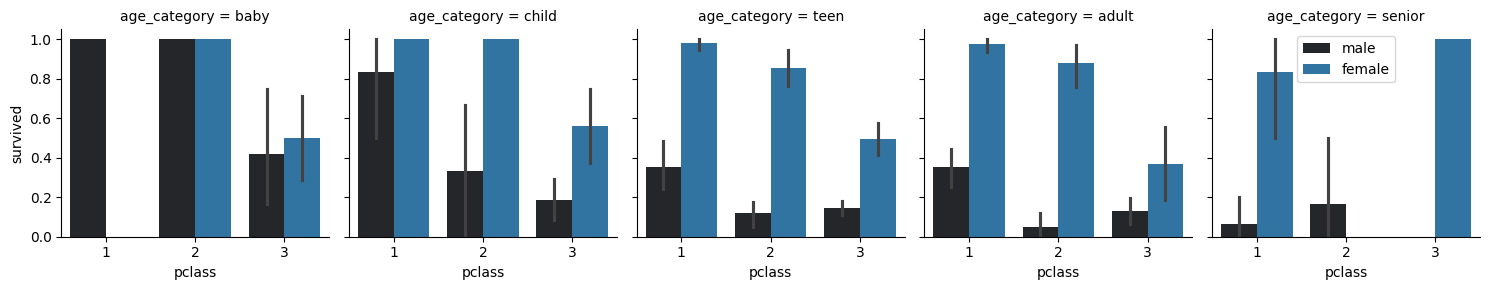

In [55]:
fg=sns.FacetGrid(df,col='age_category')
fg.map_dataframe(sns.barplot,x='pclass',y='survived',hue='Gender',hue_order=['male','female'])
plt.legend()
plt.show()

Observation:

1. Females show high survival chances with low variability.

2. Male passengers generally have lower survival chances with moderate to high variability, except for baby(infants).

19. plot the gender wise relationship between age and fare 

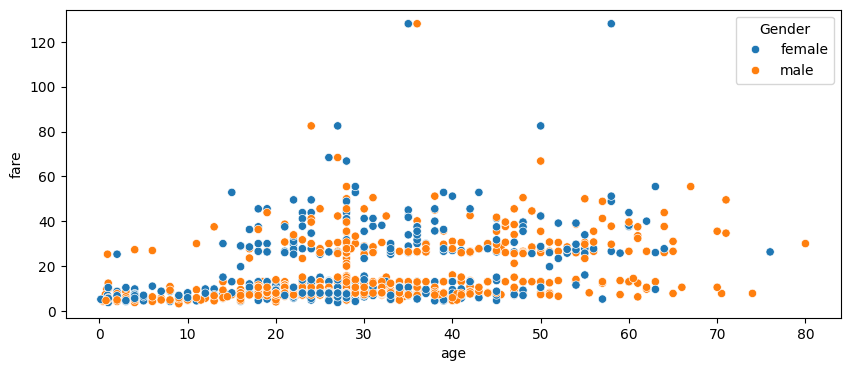

In [56]:
plt.figure(figsize=(10,4))
sns.scatterplot(df,y='fare',x='age',hue='Gender')
plt.show()

Observation:

1. Most passengers paid lower fares regardless of age or gender, showing weak/no relation with age and gender, 
while extreme high fares were mostly paid by females aged 30–60, indicating a moderate relation with gender in that range.

20. detect the outliers in fare for each pclass

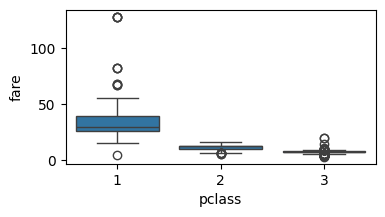

In [57]:
plt.figure(figsize=(4,2))
sns.boxplot(df,y='fare',x='pclass')
plt.show()

Observation:

Fare outliers exist within each Pclass due to differences in cabin type, social status, group vs solo travel, and port of embarkation.

21. companion_type wise no_of_ male and female along with their survival rate

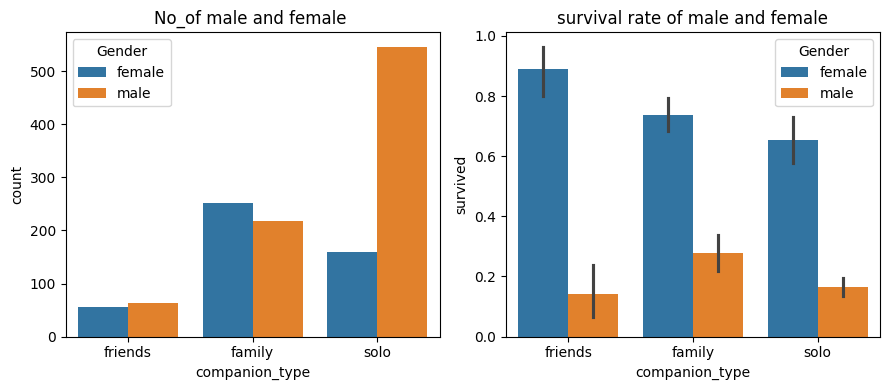

In [58]:
fig,axes=plt.subplots(1,2,figsize=(9,4))

sns.countplot(df,x='companion_type',hue='Gender',ax=axes[0])
sns.barplot(df,x='companion_type',hue='Gender',y='survived',ax=axes[1])

axes[0].set_title('No_of male and female ')
axes[1].set_title('survival rate of male and female')

plt.tight_layout()


Observations:

1. Most females travel with family, while most males travel solo.

2. Females traveling with family or friends have higher survival rates.

3. Males traveling with family also show relatively higher survival rates compared to solo males.

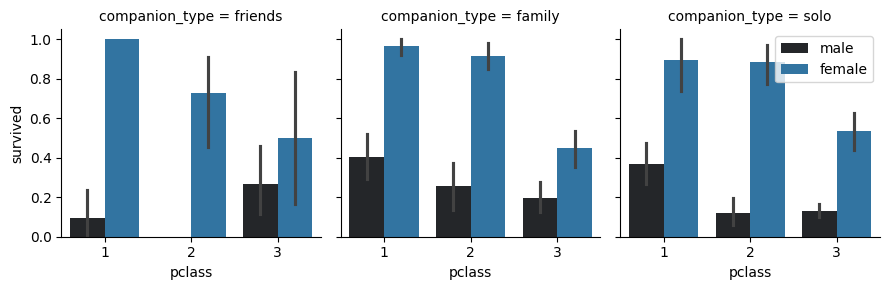

In [59]:
fg=sns.FacetGrid(df,col='companion_type')
fg.map_dataframe(sns.barplot,x='pclass',y='survived',hue='Gender',hue_order=['male','female'])
plt.legend()
plt.show()

observation:

Male survival rate depends on Pclass and companion type, with higher survival in 1st class and when traveling with family.

22. plot the correlation for age,fare,pclass,survived

<Axes: >

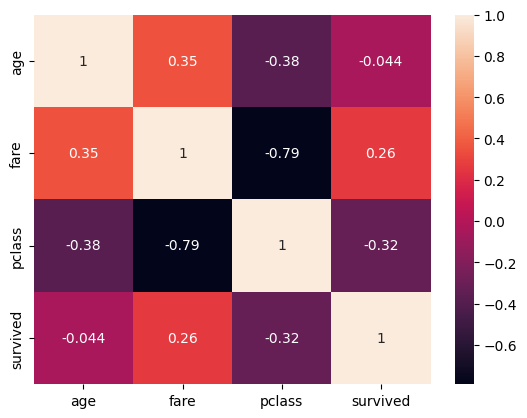

In [60]:
sns.heatmap(df[['age','fare','pclass','survived']].corr() , annot=True)

Observation:

1. Fare and Pclass have a strong negative relationship.

2. (Pclass and Age), and (Age and Fare) show weak relationships.

3. Other features have very weak or negligible relationships.

# What factors are affecting the survival rate?

Factors Affecting Survival – (Gender, Age, Pclass, Companion Type, and Social Status) influence survival.

1. Females generally have higher survival chances than males.

2. Babies and children have high survival rates.

3. Wealthy/professional passengers tend to have very high survival rates.

4. 1st-class passengers consistently have the highest survival rates.

5. Traveling with family or friends generally improves survival chances compared to traveling solo.
